In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 
from pytodcor.xcor.xcor1d import xcor1d

This notebook captures unit tests for the `xcor1d` function. The same tests are defined in the unittest .py file, but the notebook allows for further interactivity and visualization for debugging purposes when needed.

# Case #1: A Gaussian cross-correlated with an identical Gaussian and no shift between them.

In [2]:
# Generate the Gaussians to use.
f1_x = np.arange(100)
f1_y = norm.pdf(f1_x, 50., 2.)
f2_x = np.arange(100)
f2_y = norm.pdf(f1_x, 50., 2.)

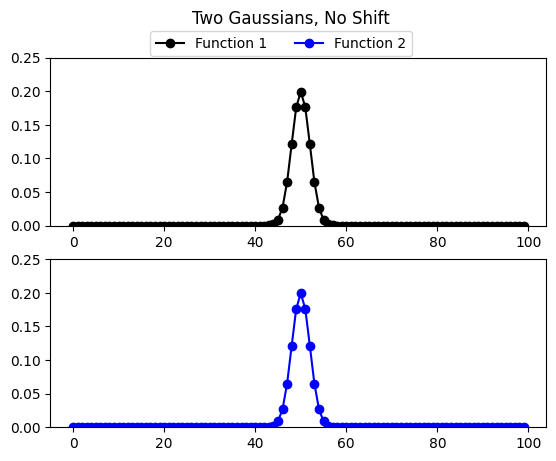

In [3]:
# Visualize the Gaussians.
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_ylim([0., 0.25])
ax2.set_ylim([0., 0.25])
ax1.plot(f1_x, f1_y, '-ko', label="Function 1")
ax2.plot(f2_x, f2_y, '-bo', label="Function 2")
fig.suptitle("Two Gaussians, No Shift")
fig.legend(ncols=2, bbox_to_anchor=[0.7, 0.95])
plt.show()

In [4]:
# Calculate the one-dimensional cross-correlation.
corr, lag = xcor1d(f1_y, f2_y)
# Find the peak value (without fitting/interpolating between points):
peak_ind = np.argmax(corr)
peak_val = corr[peak_ind]
peak_lag = lag[peak_ind]

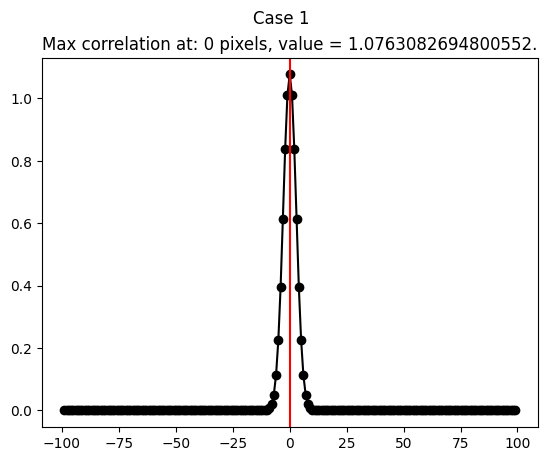

In [5]:
# Plot the cross-correlation results.
plt.plot(lag, corr, '-ko')
plt.axvline(x=peak_lag, color="red")
plt.suptitle("Case 1")
plt.title("Max correlation at: " + str(peak_lag) + " pixels, value = " + str(peak_val) + ".")
plt.show()

# Case #2: A Gaussian cross-correlated with a Gaussian half it's height and no shift between them.

In [6]:
# Generate the Gaussians to use.
f1_x = np.arange(100)
f1_y = norm.pdf(f1_x, 50., 2.)
f2_x = np.arange(100)
f2_y = norm.pdf(f1_x, 50., 2.)
f2_y *= 0.5

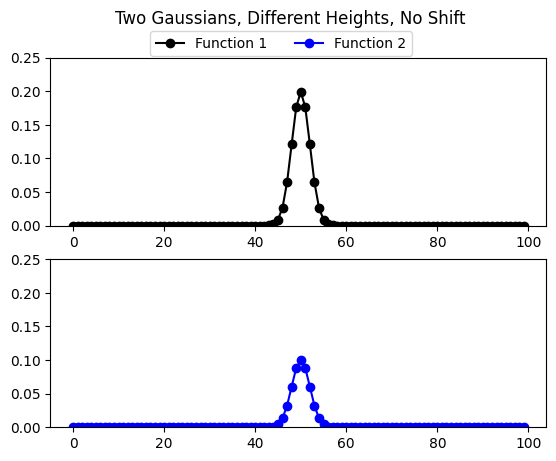

In [7]:
# Visualize the Gaussians.
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_ylim([0., 0.25])
ax2.set_ylim([0., 0.25])
ax1.plot(f1_x, f1_y, '-ko', label="Function 1")
ax2.plot(f2_x, f2_y, '-bo', label="Function 2")
fig.suptitle("Two Gaussians, Different Heights, No Shift")
fig.legend(ncols=2, bbox_to_anchor=[0.7, 0.95])
plt.show()

In [8]:
# Calculate the one-dimensional cross-correlation.
corr, lag = xcor1d(f1_y, f2_y)
# Find the peak value (without fitting/interpolating between points):
peak_ind = np.argmax(corr)
peak_val = corr[peak_ind]
peak_lag = lag[peak_ind]

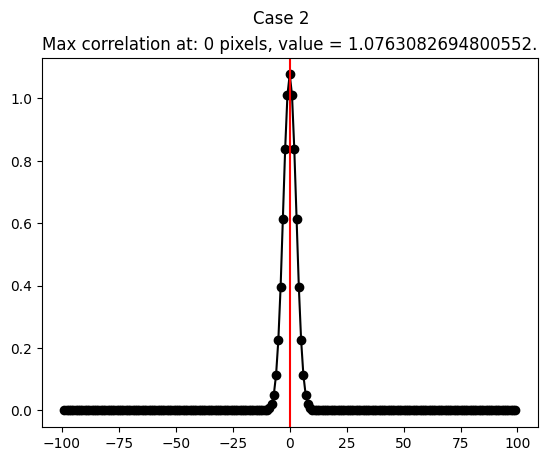

In [9]:
# Plot the cross-correlation results.
plt.plot(lag, corr, '-ko')
plt.axvline(x=peak_lag, color="red")
plt.suptitle("Case 2")
plt.title("Max correlation at: " + str(peak_lag) + " pixels, value = " + str(peak_val) + ".")
plt.show()

# Case #3: A Gaussian cross-correlated with an identical Gaussian with a shift between them.

In [10]:
# Generate the Gaussians to use.
f1_x = np.arange(100)
f1_y = norm.pdf(f1_x, 30., 2.)
f2_x = np.arange(100)
f2_y = norm.pdf(f1_x, 60., 2.)

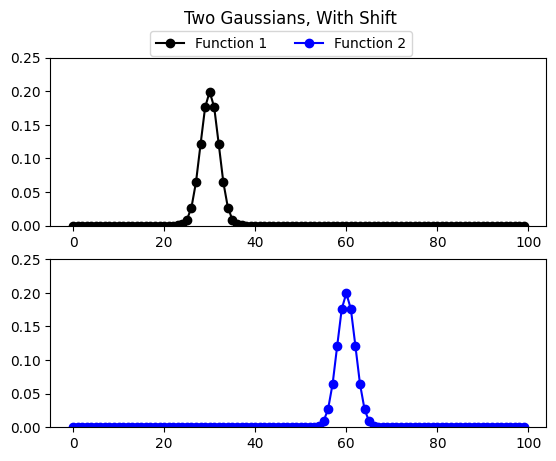

In [11]:
# Visualize the Gaussians.
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_ylim([0., 0.25])
ax2.set_ylim([0., 0.25])
ax1.plot(f1_x, f1_y, '-ko', label="Function 1")
ax2.plot(f2_x, f2_y, '-bo', label="Function 2")
fig.suptitle("Two Gaussians, With Shift")
fig.legend(ncols=2, bbox_to_anchor=[0.7, 0.95])
plt.show()

In [12]:
# Calculate the one-dimensional cross-correlation.
corr, lag = xcor1d(f1_y, f2_y)
# Find the peak value (without fitting/interpolating between points):
peak_ind = np.argmax(corr)
peak_val = corr[peak_ind]
peak_lag = lag[peak_ind]

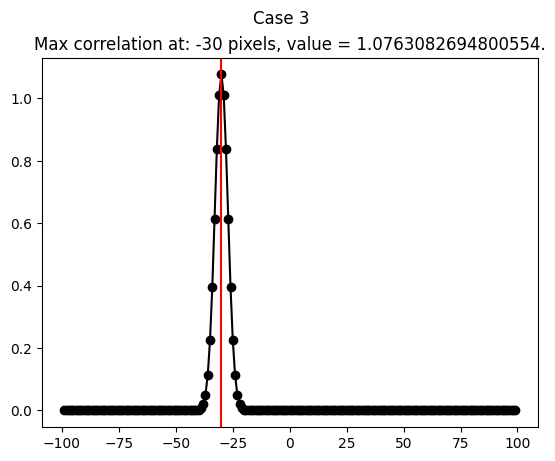

In [13]:
# Plot the cross-correlation results.
plt.plot(lag, corr, '-ko')
plt.axvline(x=peak_lag, color="red")
plt.suptitle("Case 3")
plt.title("Max correlation at: " + str(peak_lag) + " pixels, value = " + str(peak_val) + ".")
plt.show()

# Case #4: A double-peak Gaussian cross-correlated with an identical Gaussian with a shift between them.

In [14]:
# Generate the Gaussians to use.
f1_x = np.arange(100)
f1_y = norm.pdf(f1_x, 30., 2.)
f2_x = np.arange(100)
f2_y = norm.pdf(f1_x, 60., 2.)
f1_y += f2_y

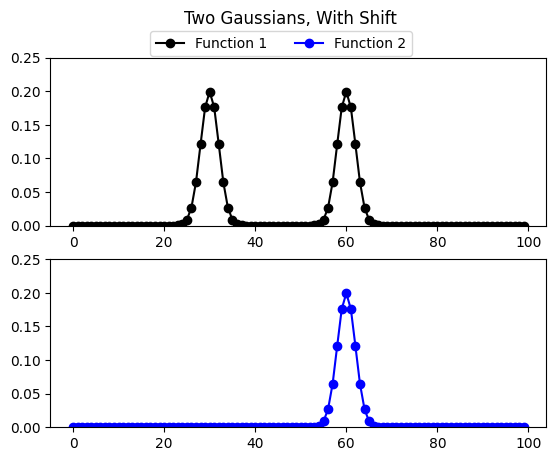

In [15]:
# Visualize the Gaussians.
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_ylim([0., 0.25])
ax2.set_ylim([0., 0.25])
ax1.plot(f1_x, f1_y, '-ko', label="Function 1")
ax2.plot(f2_x, f2_y, '-bo', label="Function 2")
fig.suptitle("Two Gaussians, With Shift")
fig.legend(ncols=2, bbox_to_anchor=[0.7, 0.95])
plt.show()

In [16]:
# Calculate the one-dimensional cross-correlation.
corr, lag = xcor1d(f1_y, f2_y)
# Find the peak values (without fitting/interpolating between points):
corr_sort_ind = np.flip(np.argsort(corr))
peak_val, peak_val_2 = corr[corr_sort_ind[0:2]]
peak_lag, peak_lag_2 = lag[corr_sort_ind[0:2]]

print("Two strongest peak values: " + str(peak_val) + " and " + str(peak_val_2))
print("Lags of the two strongest peak values: " + str(peak_lag) + " and " + str(peak_lag_2))

Two strongest peak values: 0.7918777700830607 and 0.7918777700830606
Lags of the two strongest peak values: 0 and -30


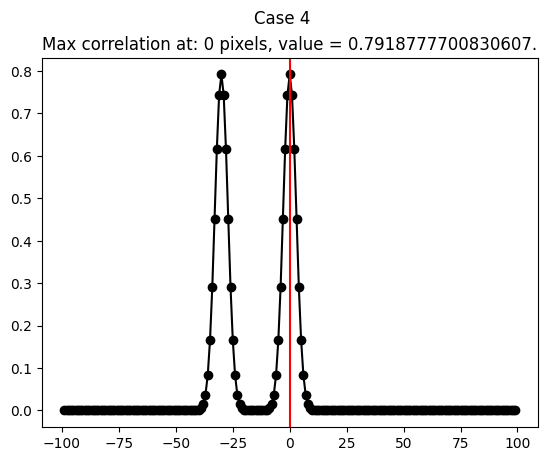

In [18]:
# Plot the cross-correlation results.
#%matplotlib widget
plt.plot(lag, corr, '-ko')
plt.axvline(x=peak_lag, color="red")
plt.suptitle("Case 4")
plt.title("Max correlation at: " + str(peak_lag) + " pixels, value = " + str(peak_val) + ".")
plt.show()